**Index No : 200462U**

**Name : Randika Perera**

# Section 1: Logistic Regression Weight Update Process

**1. Use the code given in listing 1 to generate data.**

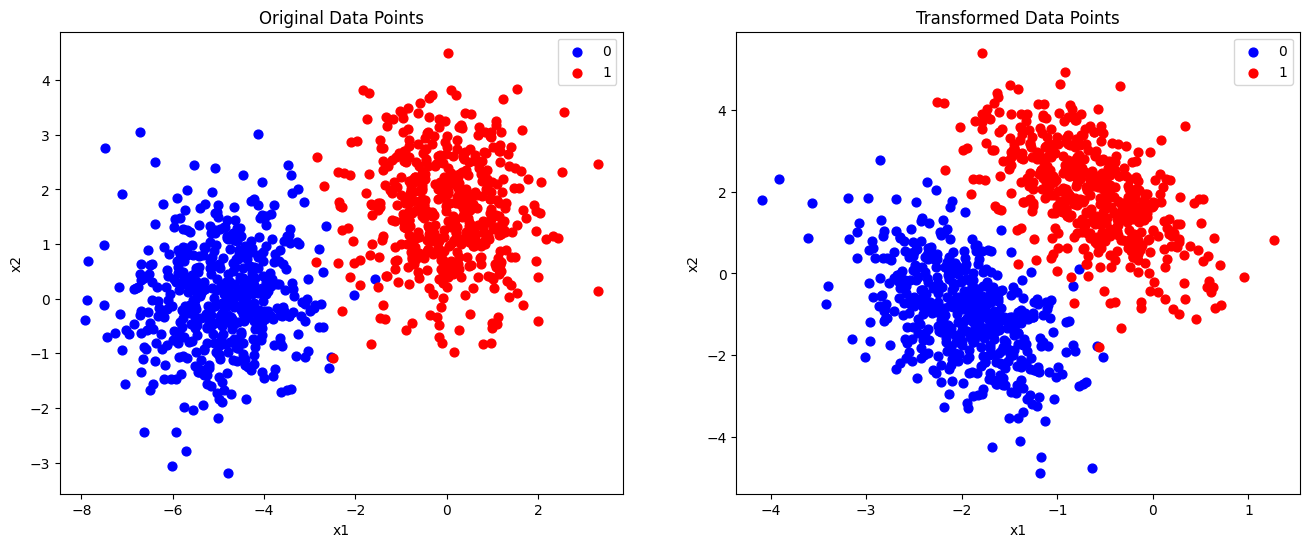

Dimensions of X:  (1000, 3) 	 1000 samples, 2 features
Dimensions of y:  (1000,) 	 1000 samples, 1 label
Dimensions of W:  (3,) 		 3 coefficients (1 bias and 2 features)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5,0],[0,1.5]]

X,y = make_blobs(n_samples=1000,centers=centers,random_state=40) 
# Generates synthetic data. It creates a dataset with 1000 samples 
# using the specified centers. X will be a matrix containing the 
# features, and y will be an array containing the corresponding labels.


# Plot the original data points
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', s=40, label='0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', s=40, label='1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Original Data Points')
plt.legend()

transformation = [[0.4,0.2],[-0.4,1.2]]
X = np.dot(X,transformation)
# Applies the transformation to the data points. Performs a matrix 
# multiplication between the data matrix X and the transformation matrix.


# Plot the transformed data points
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', s=40, label='0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', s=40, label='1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Transformed Data Points')
plt.legend()

plt.show()


# Add a bias term to the feature matrix
X = np.c_[np.ones((X.shape[0],1)),X]
# Appends a column of ones to the beginning of X. 

# Initialize coefficients
W = np.zeros(X.shape[1])

print("Dimensions of X: ",X.shape,'\t', '1000 samples, 2 features')
print("Dimensions of y: ",y.shape,'\t', '1000 samples, 1 label')
print("Dimensions of W: ",W.shape,'\t\t', '3 coefficients (1 bias and 2 features)') 
print()

# Define the logistic sigmoid function
def sigmoid (z):
    return 1/(1+np.exp(-z))

# Define the logistic loss (binary cross-entropy) function
def log_loss(y_true,y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred,epsilon,1-epsilon) # Clip to avoid log (0)
    return -(y_true*np.log(y_pred)+(1-y_true)*np.log (1-y_pred))

# Gradient descent and Newton method parameters
learning_rate = 0.1
iterations = 10
loss_history = []

**2. Initializing weights as zeros, perform gradient descent based weight update for the given data. Here, use binary cross entropy as a loss function. Further, use learning rate as $\alpha$  = 0.1 and number of iterations as t = 10. Batch Gradient descent weight update is given below,**

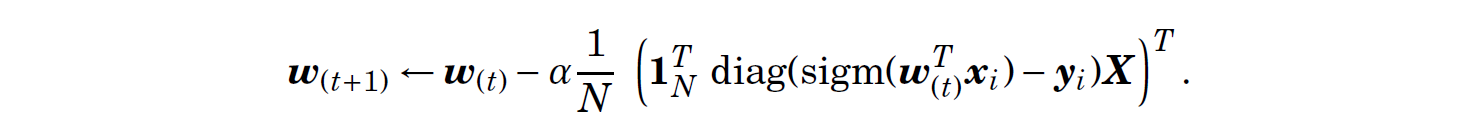

**Here, X is data matrix of dimension of N×(D+1). Here, N is total number of data samples and D is number of features. Now, X is given by,**

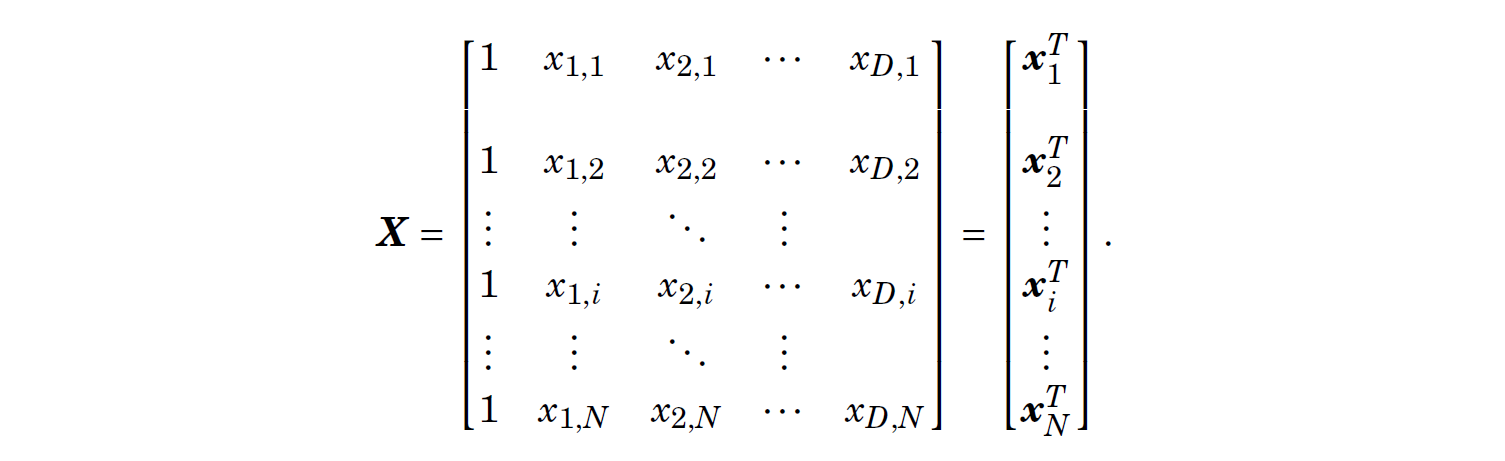

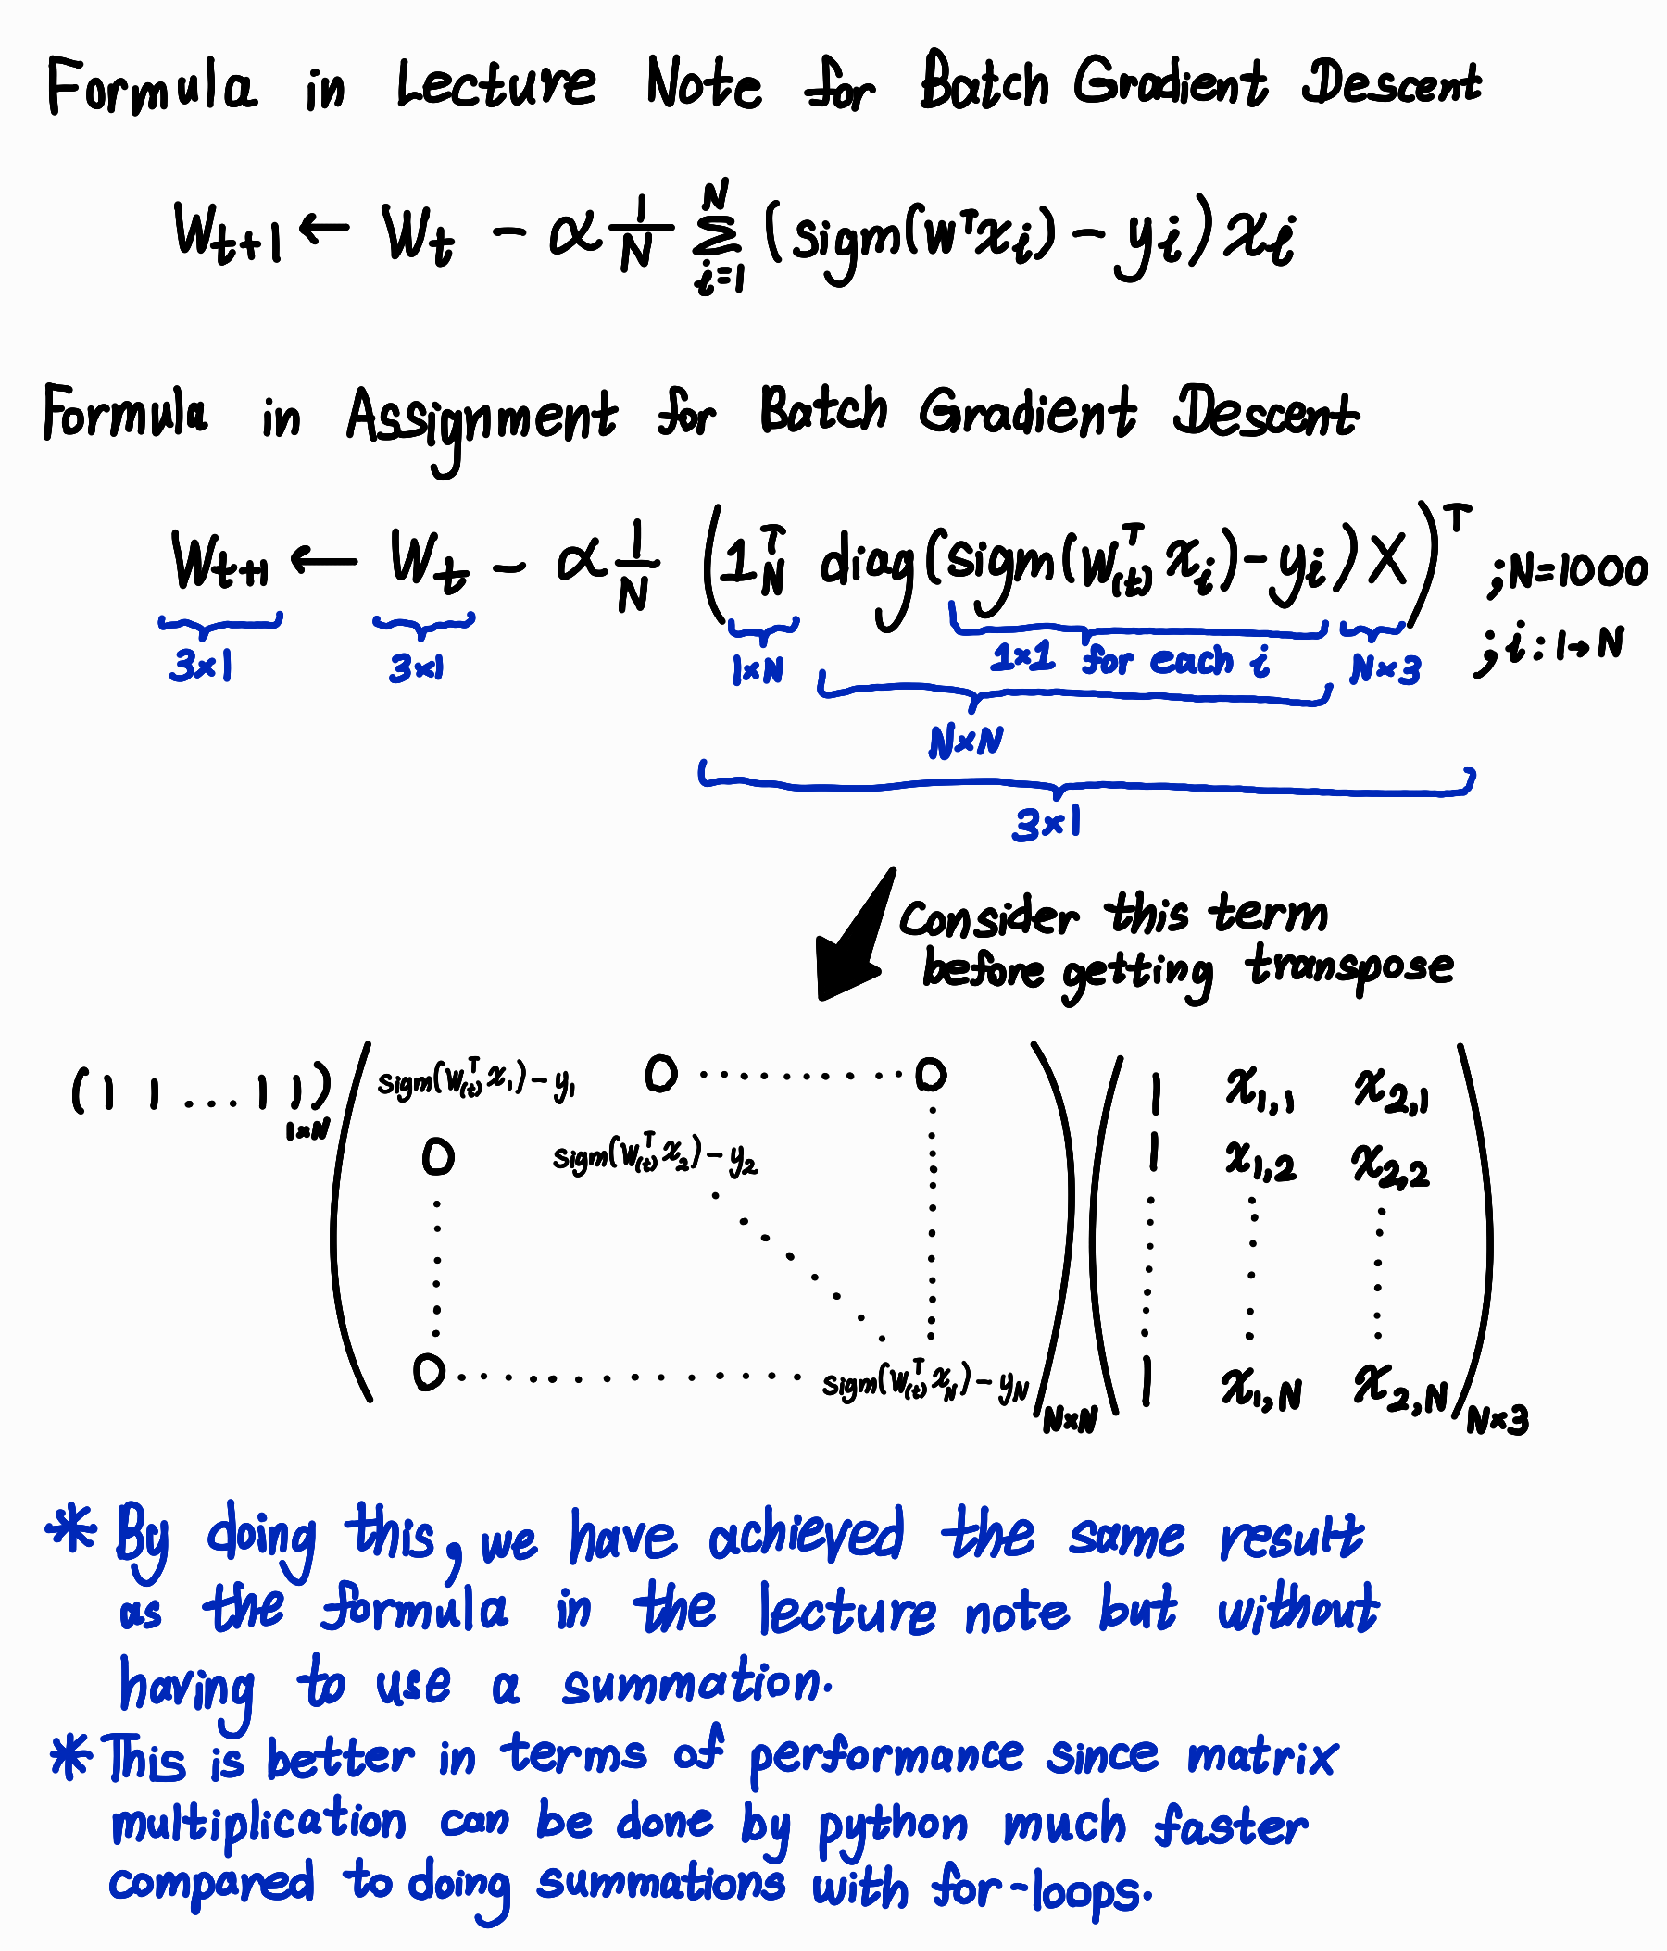

In [2]:
learning_rate = 0.1
iterations = 10
loss_history = []
N=X.shape[0]

Mat_1N = np.ones((N,1))
Mat_1N_T=Mat_1N.T
W=W.reshape(3,1)

for t in range(iterations):
    
    V=np.array([])
    for j in range(N): 
        temp = np.dot(W.T,(X[j].reshape(3,1)))
        Mat_Error = sigmoid(temp)-y[j]
        V = np.append(V,Mat_Error)
    D=np.diag(V)
    
    P1 = np.dot(Mat_1N_T,D)
    P2 = np.dot(P1,X)
    P3 = P2.T
    W  = W - learning_rate*(1/N)*P3
    
    total_loss = 0
    for j in range(N): 
        temp2 = np.dot(W.T,(X[j].reshape(3,1)))
        y_pred = sigmoid(temp2)
        loss = log_loss(y[j],y_pred)
        total_loss = total_loss + loss
        
    loss_history.append(total_loss)


print("Printing dimensions of matrices that were multiplied:")
print('Dimensions of 1NT\t:',Mat_1N_T.shape)
print('Dimensions of D\t\t:',D.shape) 
print('Dimensions of X\t\t:',X.shape)
print()


print("Final Values of W after 10 iterations : ")
print('W0  : ',W[0][0])
print('W1  : ',W[1][0])
print('W2  : ',W[2][0])
print()

Printing dimensions of matrices that were multiplied:
Dimensions of 1NT	: (1, 1000)
Dimensions of D		: (1000, 1000)
Dimensions of X		: (1000, 3)

Final Values of W after 10 iterations : 
W0  :  0.009031764884538475
W1  :  0.262301155857097
W2  :  0.4994938404035172



**3. Plot the loss with respect to number of iterations.**

Loss after each iteration: 
Iteration  1 	:  632.8211522065749
Iteration  2 	:  582.3972949578108
Iteration  3 	:  540.0400231011128
Iteration  4 	:  504.20511023719166
Iteration  5 	:  473.6389534183554
Iteration  6 	:  447.34329598374705
Iteration  7 	:  424.5298511469434
Iteration  8 	:  404.5770169455822
Iteration  9 	:  386.9932100238963
Iteration  10 	:  371.3875460331648

Plotting Loss with respect to number of iterations


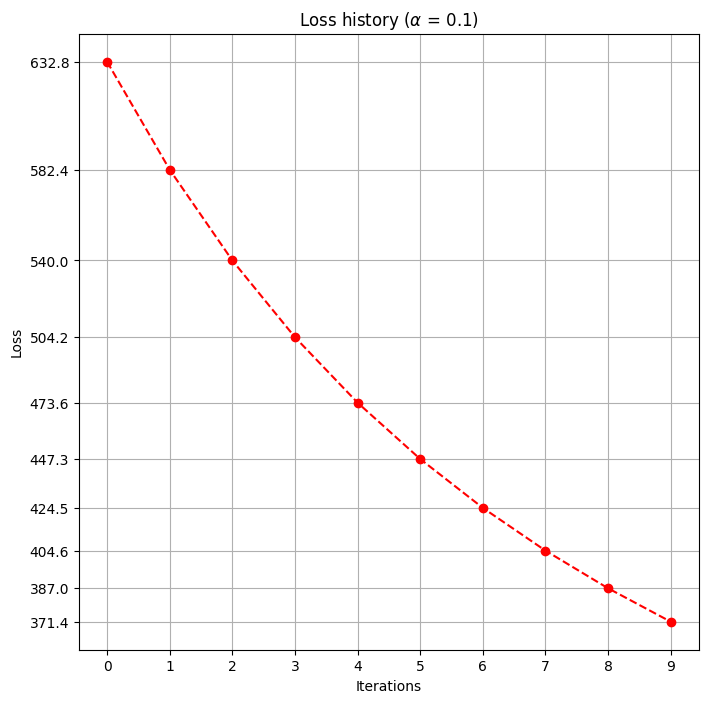

In [3]:
loss_history_array=[]

for l in range(len(loss_history)):
    loss_history_array.append(loss_history[l][0][0])


print('Loss after each iteration: ')
for i in range(1,int(iterations+1)):
    print("Iteration ",i,"\t: ",loss_history_array[i-1])


print()
print('Plotting Loss with respect to number of iterations')
plt.figure(figsize=(8,8))
plt.plot(loss_history_array, marker='o', linestyle='--', color='r')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title(r'Loss history ($\alpha$ = 0.1)')
plt.xticks(range(len(loss_history_array)), fontsize=10)
plt.yticks(loss_history_array, fontsize=10)
plt.grid(True)
plt.show()
print()

**4. Initializing weights as zeros, perform Newton’s method weight update for the given data. Here, use binary cross entropy as a loss function. Further, set number of iterations as t = 10. Batch Newton’s method weight update is given below,**

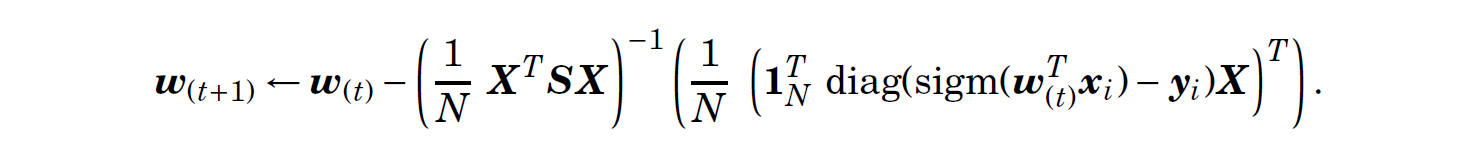

**and is S given by,**

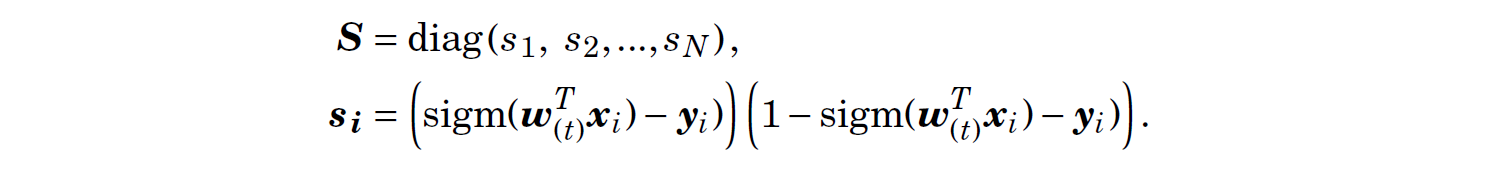

In [4]:
learning_rate = 0.1
iterations = 10
loss_history_newton = []
N=X.shape[0]
W_newton = np.zeros(X.shape[1])
Mat_1N = np.ones((N,1))
Mat_1N_T=Mat_1N.T
W_newton=W_newton.reshape(3,1)



from numpy.linalg import inv


for t in range(iterations):


    #FINDING FIRST TERM OF UPDATE TERM (P1)

    S_vect=np.array([])
    for i in range(N):
        temp3 = np.dot(W.T,(X[i].reshape(3,1)))
        S_i = (sigmoid(temp3)-y[i])*(1-sigmoid(temp3)-y[i])
        S_vect = np.append(S_vect,S_i)
    S=np.diag(S_vect)
    
    P1=np.dot(X.T,S)
    P1=np.dot(P1,X)
    P1=P1/N
    P1_inverse = inv(P1)


    #FINDING SECOND TERM OF UPDATE TERM (P2)

    V=np.array([])
    for j in range(N): 
        temp = np.dot(W_newton.T,(X[j].reshape(3,1)))
        Mat_Error = sigmoid(temp)-y[j]
        V = np.append(V,Mat_Error)
    D=np.diag(V)
    
    P2 = np.dot(Mat_1N_T,D)
    P2 = np.dot(P2,X)
    P2 = P2.T
    P2 = P2/N


    # UPDATE WEIGHTS

    W_newton = W_newton - np.dot(P1_inverse,P2)
    
    total_loss = 0
    for j in range(N): 
        temp2 = np.dot(W_newton.T,(X[j].reshape(3,1)))
        y_pred = sigmoid(temp2)
        loss = log_loss(y[j],y_pred)
        total_loss = total_loss + loss
        
    loss_history_newton.append(total_loss)


print("Final Values of W after 10 iterations (Newton's Method) : ")
print('W0  : ',W_newton[0][0])
print('W1  : ',W_newton[1][0])
print('W2  : ',W_newton[2][0])
print()

Final Values of W after 10 iterations (Newton's Method) : 
W0  :  3.1457578120619933
W1  :  2.96792077497755
W2  :  1.4806766332837635



**5. Plot the loss with respect to number of iterations.**

Loss after each iteration (Newton's method): 
Iteration  1 	:  127.85969050031866
Iteration  2 	:  100.7176514383628
Iteration  3 	:  86.07852986133256
Iteration  4 	:  76.50289307262261
Iteration  5 	:  69.62045412369841
Iteration  6 	:  64.37928368862639
Iteration  7 	:  60.22614693088306
Iteration  8 	:  56.837486596291306
Iteration  9 	:  54.00956730716648
Iteration  10 	:  51.60686780872303

Plotting Loss with respect to number of iterations (Newton's Method)


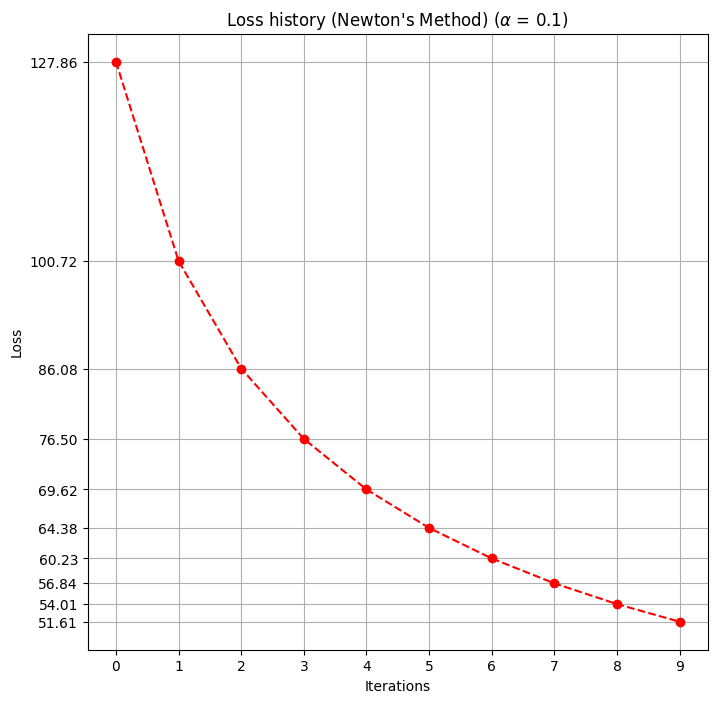

In [5]:
loss_history_array_newton=[]

for l in range(len(loss_history_newton)):
    loss_history_array_newton.append(loss_history_newton[l][0][0])

print('Loss after each iteration (Newton\'s method): ')
for i in range(1,int(iterations)+1):
    print("Iteration ",i,"\t: ",loss_history_array_newton[i-1])



print()
print('Plotting Loss with respect to number of iterations (Newton\'s Method)')
plt.figure(figsize=(8,8))
plt.plot(loss_history_array_newton, marker='o', linestyle='--', color='r')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title(r"Loss history (Newton's Method) ($\alpha$ = 0.1)")
plt.xticks(range(len(loss_history_array_newton)), fontsize=10)
plt.yticks(loss_history_array_newton, fontsize=10)
plt.grid(True)
plt.show()
print()

**6. Plot the loss with respect to number of iterations for both Gradient descent and Newton method’s in a single plot. Comment on your results.**

Plotting on 2 seperate plots for better visualization


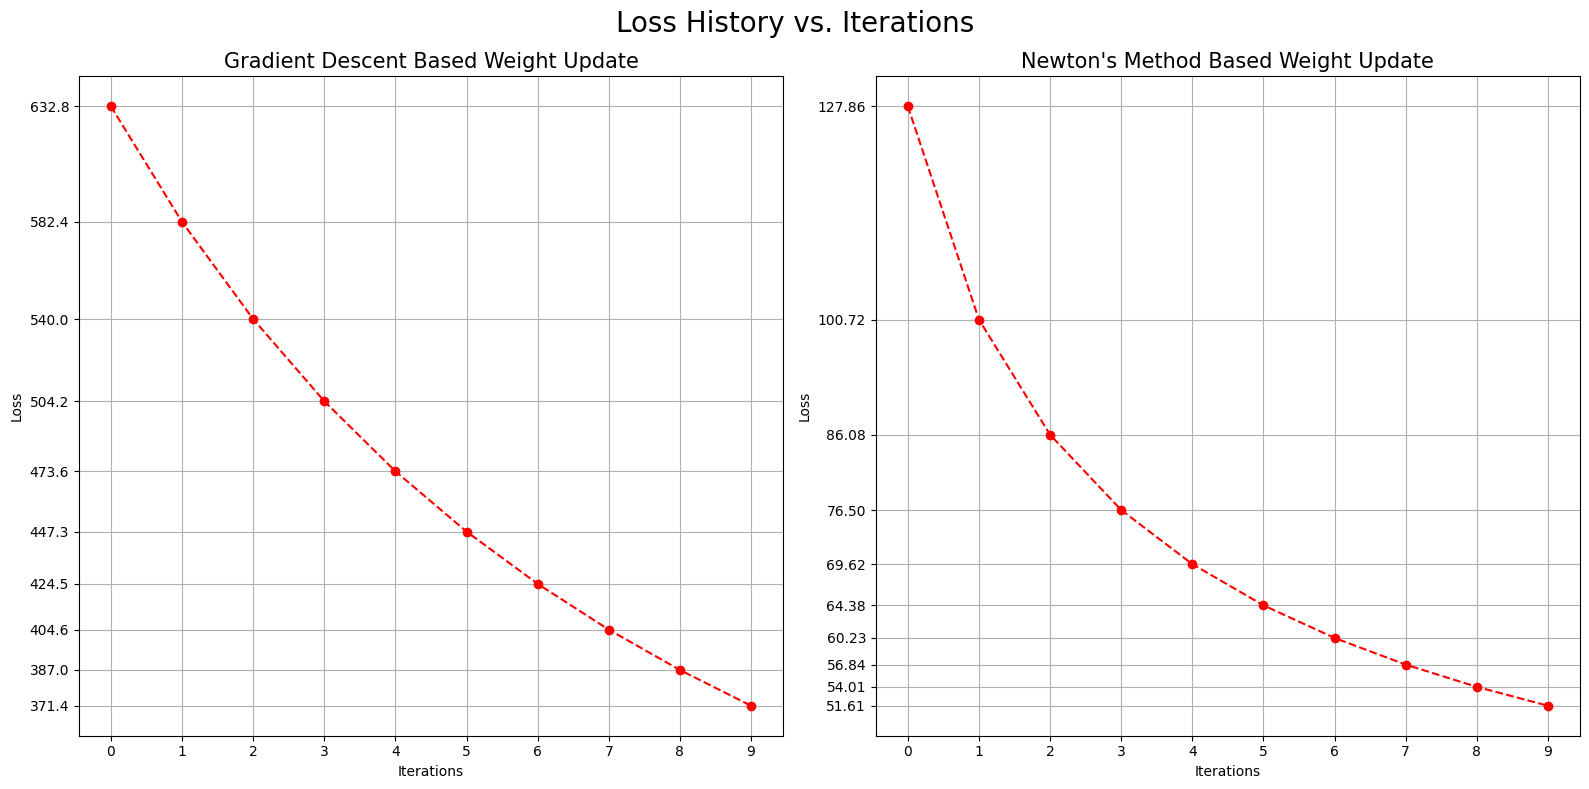

In [6]:
print("Plotting on 2 seperate plots for better visualization")

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.suptitle('Loss History vs. Iterations',fontsize=20)
plt.plot(loss_history_array, marker='o', linestyle='--', color='r')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title(r'Gradient Descent Based Weight Update',fontsize=15)
plt.xticks(range(len(loss_history_array)), fontsize=10)
plt.yticks(loss_history_array, fontsize=10)
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(loss_history_array_newton, marker='o', linestyle='--', color='r')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title(r"Newton's Method Based Weight Update",fontsize=15)
plt.xticks(range(len(loss_history_array_newton)), fontsize=10)
plt.yticks(loss_history_array_newton, fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

Plotting on the same plot as requested in the question


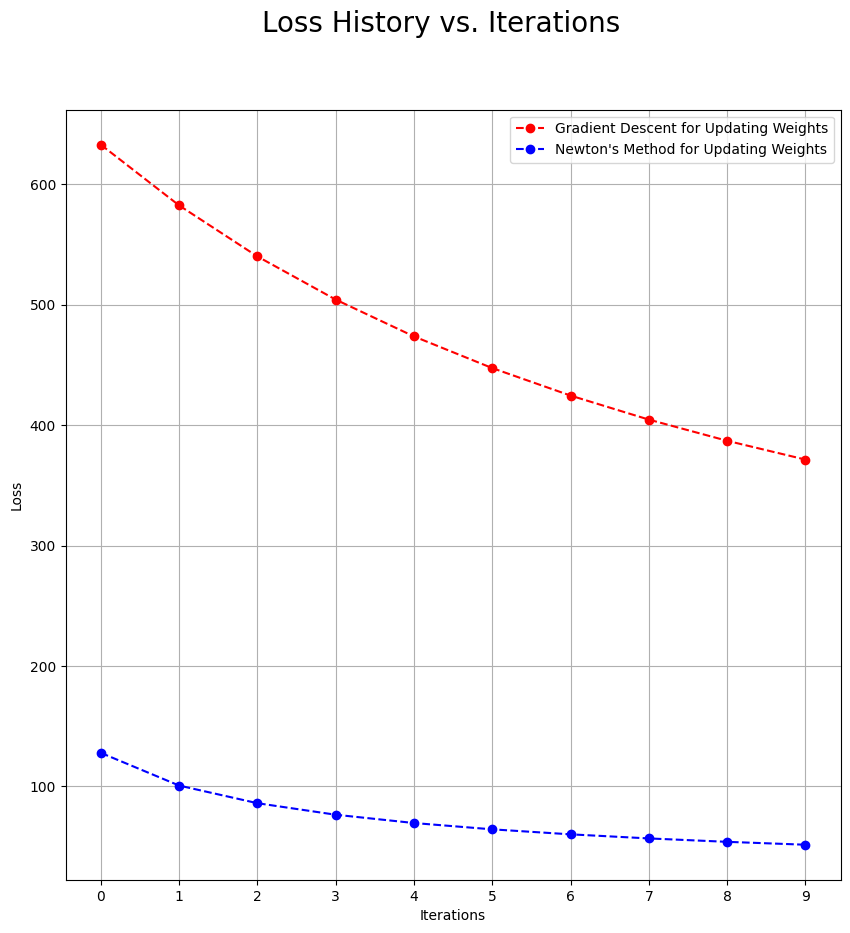

In [7]:
print("Plotting on the same plot as requested in the question")

plt.figure(figsize=(10, 10))
plt.suptitle('Loss History vs. Iterations',fontsize=20)
plt.plot(loss_history_array, marker='o', linestyle='--', color='r', label='Gradient Descent for Updating Weights')
plt.plot(loss_history_array_newton, marker='o', linestyle='--', color='b', label="Newton's Method for Updating Weights")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.xticks(range(len(loss_history_array)), fontsize=10)
plt.legend()  
plt.grid(True)
plt.show()

- We can see that when we used Newton's method for updating weights, the loss has decreased much faster compared to gradient descent based updating. 

- Even at the first iteration, Newton's method based updating has given a much lower loss compared to gradient descent based updating.

- Newton's method based updating seems to have much faster convergence compared to gradient descent based updating.

Let's run the same code for more iterations and see how the loss changes. I will use **2000 iterations for gradient descent** and **20 iterations for Newton's method.**

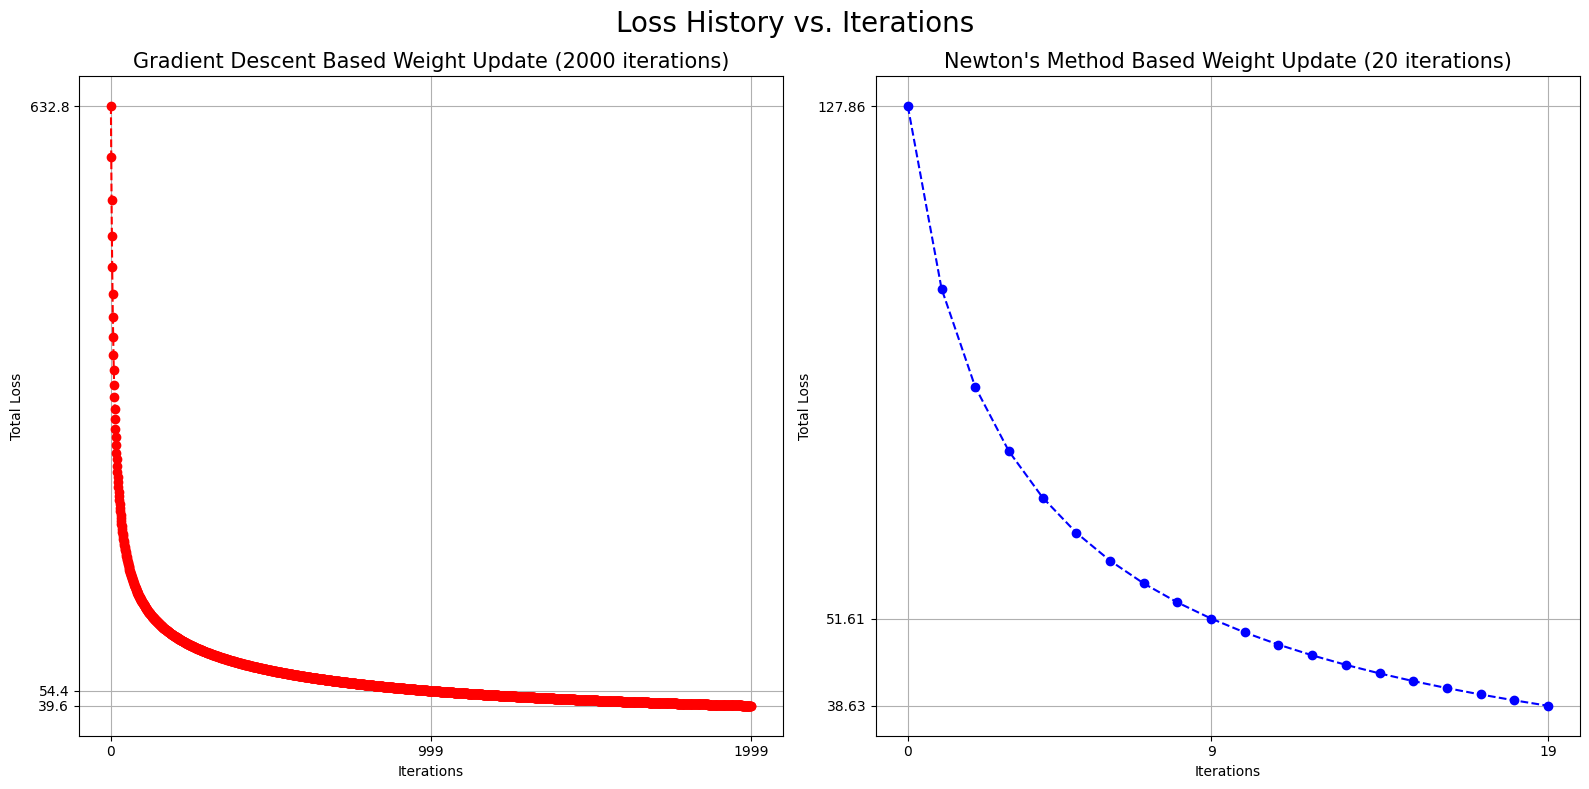

In [8]:
# Newton's Method Based Updating with 20 iterations
learning_rate = 0.1
iterations = 20
loss_history_newton = []
N=X.shape[0]
W_newton = np.zeros(X.shape[1])
Mat_1N = np.ones((N,1))
Mat_1N_T=Mat_1N.T
W_newton=W_newton.reshape(3,1)
from numpy.linalg import inv
for t in range(iterations):
    S_vect=np.array([])
    for i in range(N):
        temp3 = np.dot(W.T,(X[i].reshape(3,1)))
        S_i = (sigmoid(temp3)-y[i])*(1-sigmoid(temp3)-y[i])
        S_vect = np.append(S_vect,S_i)
    S=np.diag(S_vect)
    P1=np.dot(X.T,S)
    P1=np.dot(P1,X)
    P1=P1/N
    P1_inverse = inv(P1)
    V=np.array([])
    for j in range(N): 
        temp = np.dot(W_newton.T,(X[j].reshape(3,1)))
        Mat_Error = sigmoid(temp)-y[j]
        V = np.append(V,Mat_Error)
    D=np.diag(V)
    P2 = np.dot(Mat_1N_T,D)
    P2 = np.dot(P2,X)
    P2 = P2.T
    P2 = P2/N
    W_newton = W_newton - np.dot(P1_inverse,P2)
    total_loss = 0
    for j in range(N): 
        temp2 = np.dot(W_newton.T,(X[j].reshape(3,1)))
        y_pred = sigmoid(temp2)
        loss = log_loss(y[j],y_pred)
        total_loss = total_loss + loss
    loss_history_newton.append(total_loss)
loss_history_array_newton=[]
for l in range(len(loss_history_newton)):
    loss_history_array_newton.append(loss_history_newton[l][0][0])


# Gradient Descent Based Updating with 2000 iterations
learning_rate = 0.1
iterations = 2000
loss_history = []
N=X.shape[0]
Mat_1N = np.ones((N,1))
Mat_1N_T=Mat_1N.T
W=np.zeros(X.shape[1])
W=W.reshape(3,1)
for t in range(iterations):
    V=np.array([])
    for j in range(N): 
        temp = np.dot(W.T,(X[j].reshape(3,1)))
        Mat_Error = sigmoid(temp)-y[j]
        V = np.append(V,Mat_Error)
    D=np.diag(V)
    P1 = np.dot(Mat_1N_T,D)
    P2 = np.dot(P1,X)
    P3 = P2.T
    W  = W - learning_rate*(1/N)*P3
    total_loss = 0
    for j in range(N): 
        temp2 = np.dot(W.T,(X[j].reshape(3,1)))
        y_pred = sigmoid(temp2)
        loss = log_loss(y[j],y_pred)
        total_loss = total_loss + loss 
    loss_history.append(total_loss)
loss_history_array=[]
for l in range(len(loss_history)):
    loss_history_array.append(loss_history[l][0][0])


# Plotting the loss history for both methods
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.suptitle('Loss History vs. Iterations',fontsize=20)
plt.plot(loss_history_array, marker='o', linestyle='--', color='r')
plt.xlabel('Iterations')
plt.ylabel('Total Loss')
plt.title(r'Gradient Descent Based Weight Update (2000 iterations)',fontsize=15)
xticks_indices = [0, (len(loss_history_array)-1)//2 , len(loss_history_array)-1]  # Set xticks to first and last index
yticks_indices = [loss_history_array[0], loss_history_array[(len(loss_history_array)-1)//2], loss_history_array[-1]]  # Set yticks to first and last value
plt.xticks(xticks_indices, fontsize=10)
plt.yticks(yticks_indices, fontsize=10)
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(loss_history_array_newton, marker='o', linestyle='--', color='b')
plt.xlabel('Iterations')
plt.ylabel('Total Loss')
plt.title(r"Newton's Method Based Weight Update (20 iterations)",fontsize=15)
xticks_indices_newton = [0, (len(loss_history_array_newton)-1)//2 , len(loss_history_array_newton)-1]  # Set xticks to first and last index
yticks_indices_newton = [loss_history_array_newton[0], loss_history_array_newton[(len(loss_history_array_newton)-1)//2], loss_history_array_newton[-1]]  # Set yticks to first and last value
plt.xticks(xticks_indices_newton, fontsize=10)
plt.yticks(yticks_indices_newton, fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

- Here I have carried out Logistic Regression on the same data set with same learning rate.
- The only difference is the Weight Update Method.
- When I used **Gradient Descent** for weight update, I used **2000 iterations** and when I used **Newton's Method** for weight update, I used **20 iterations**.
- We can clearly see that convergence is much faster when we use Newton's Method for weight update.
- From above plot we can also see that in this case, **after 1000 iterations**, Gradient Descent based Weight Updating gave a **loss of 54.4** while Newton's Method based Weight Updating gave a **loss of 51.61 after only 10 iterations.**
- Due to these reasons, Newton's Method based Weight Updating is much better than Gradient Descent based Weight Updating in terms of speed and performance.

# Section 2: Perform Grid Search for Hyperparameter Tuning

In [9]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

**1. Use the code given in listing 2 to load data.**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import check_random_state


# DATA LOADING

train_samples = 500   
# Number of samples to be used for training

X,y = fetch_openml("mnist_784",version=1,return_X_y=True,as_frame=False) 
# Loads the MNIST dataset.
# Return features (X) and labels (y) separately. 
# as_frame=False ensures that data is returned as NumPy arrays instead of pandas DataFrame.

random_state = check_random_state(0) 
# Initializes a random state
# This is for reproducibility, so the same random operations yield the same results.

permutation = random_state.permutation(X.shape[0])
# Creates a random permutation of indices from 0 to the number of samples in X.

X = X[permutation] 
y = y[permutation]
#  Shuffles the dataset based on the generated permutation. This ensures that the data is randomly ordered.

X = X.reshape((X.shape[0],-1)) 
# The data is reshaped to have a 2D structure with one row per image and each row containing the flattened pixel values of an image.

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=train_samples,test_size=100)
# Splits the data into training and test sets.

**2. Explain the purpose of "X = X[permutation]" and " y = y[permutation]".**

Simply speaking, X[permutation] and y[permutation] are used to shuffle (randomly permute) the dataset.

Here is a detailed explanation,

- X is a NumPy array containing the features (in this case, pixel values of images) of the dataset.
- Permutation is an array of indices that have been randomly shuffled. For example, if permutation is [3, 1, 0, 2], it means that the rows of X will be rearranged so that the row at index 3 in the original data becomes the first row, the row at index 1 becomes the second row, and so on.
- This operation effectively shuffles the order of the rows in the dataset. This is important for **ensuring that the data is not biased by any pre-existing order** (for example, if the data was originally sorted in any particular way).
- y is a NumPy array containing the target labels (in this case, the digits corresponding to the images).
- Permutation is again used to shuffle the order of the labels. This **ensures that each label remains associated with the corresponding image after the shuffling.**
- This operation ensures that the labels are in the same random order as the corresponding images.

In summary, X=X[permutation] and y=y[permutation] together ensure that the features and labels are shuffled in the same random order. This is done to prevent any biases in the data that may arise from its original ordering.

**3. Use lasso logistic regression for image classification as "LogisticRegression(penalty=’l1’, solver=’liblinear’, multi_class=’auto’)". Next, create a pipeline that includes the scaling, the Lasso logistic regression estimator, and a parameter grid for hyperparameter tuning (C value ).**

In [11]:
# Create a pipeline with StandardScaler and Lasso Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto'))
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__C': np.logspace(-2, 2, 9)
}

**4. Use GridSearchCV to perform a grid search over the range (e.g., np.logspace(-2, 2, 9)) of to find optimal value of hyperparameter C.**

In [12]:
# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_C = grid_search.best_params_['classifier__C']
print(f'Best value of C: {best_C}')

Best value of C: 0.31622776601683794


**5. Plot the classification accuracy with respect to hyperparameter C. Comment on your results.**

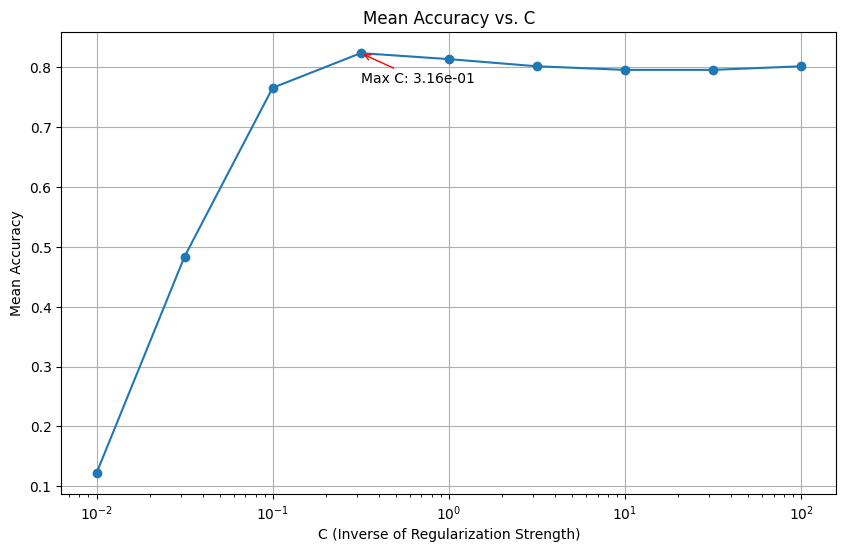

In [13]:
# Extract the mean cross-validated scores for each C value
mean_scores = grid_search.cv_results_['mean_test_score']

# Find the index corresponding to the maximum mean score
best_index = np.argmax(mean_scores)

# Find the corresponding value of C
best_C = param_grid['classifier__C'][best_index]

# Plot the mean scores against C values
plt.figure(figsize=(10, 6))
plt.semilogx(param_grid['classifier__C'], mean_scores, marker='o')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs. C')
plt.grid(True)

# Annotate the maximum value of C with an arrow from below
plt.annotate(f'Max C: {best_C:.2e}', xy=(best_C, mean_scores[best_index]), xytext=(best_C, mean_scores[best_index]-0.05),arrowprops=dict(arrowstyle='->', color='red'))
plt.show()

**Comments**

- All C values from 0.316 to 100 have a mean accuracy of around 0.8.
- The maximum possible value occurs at **0.316**. So we have selected that value for C in our model.

**6. Calculate confusion matrix, precision, recall and F1-score. Comment on your results.**

In [14]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Confusion Matrix:
[[ 6  0  0  0  0  1  0  0  1  0]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0]
 [ 0  1  0  0  8  0  0  0  0  2]
 [ 0  0  0  0  1  3  0  0  0  0]
 [ 0  0  0  0  1  0  8  0  0  0]
 [ 0  0  0  0  1  0  0 11  0  2]
 [ 0  0  0  0  1  0  0  0 11  0]
 [ 0  1  0  1  0  1  0  1  0 11]]
Precision: 0.8594
Recall: 0.8500
F1-score: 0.8509


Let's plot the above confusion matrix in a more readable way using seaborn.

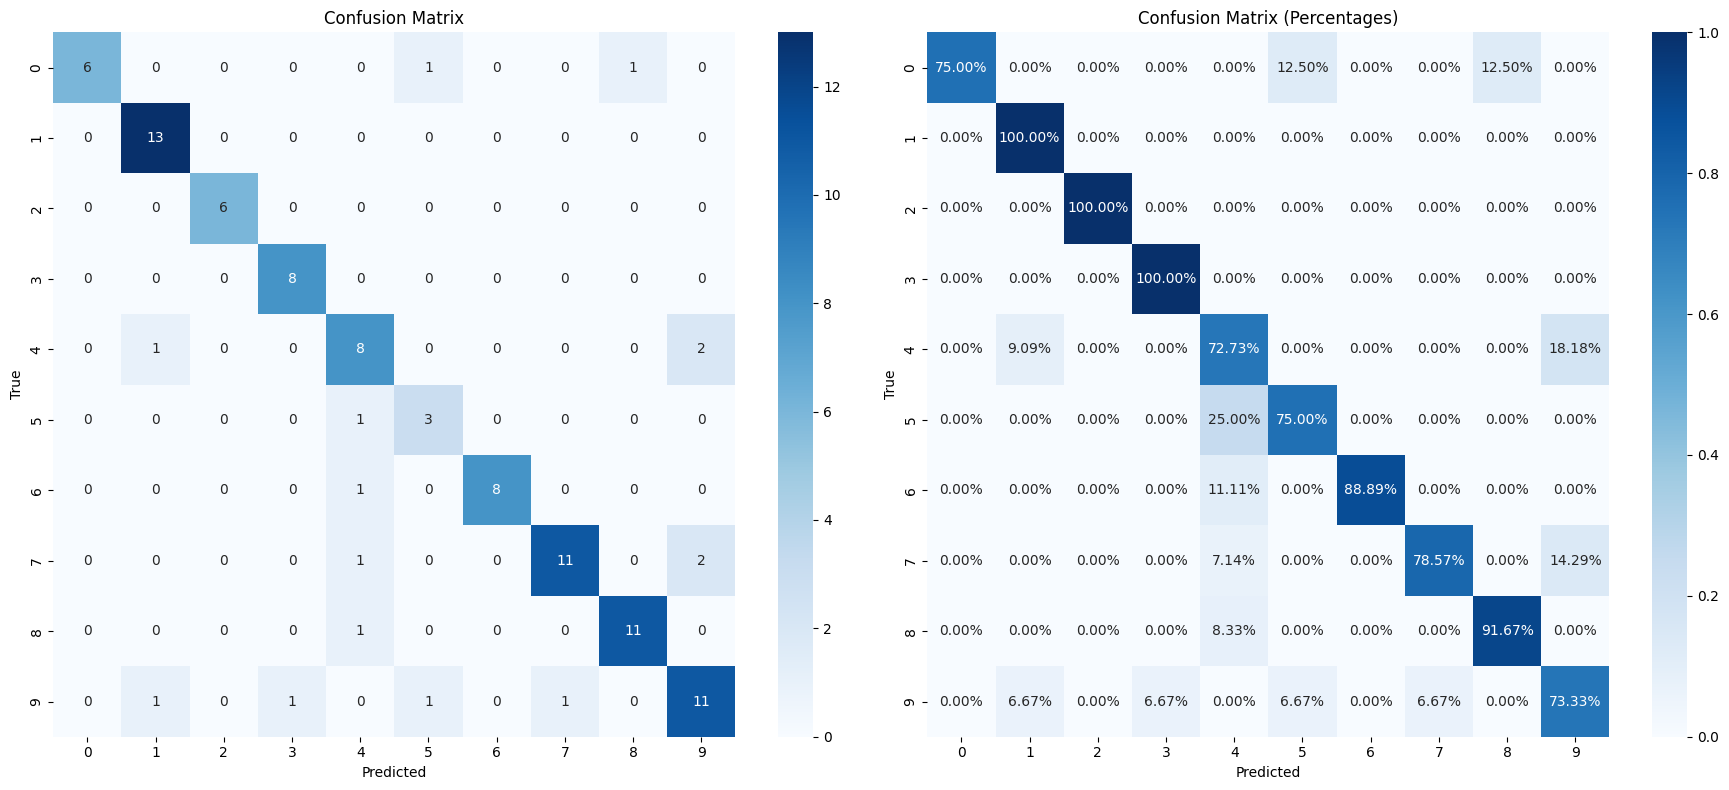

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels (assuming y_test and y_pred contain class labels)
class_labels = np.unique(np.concatenate((y_test, y_pred)))

# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot the first confusion matrix
plt.sca(axes[0])
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Calculate percentages
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the second confusion matrix with percentages
plt.sca(axes[1])
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2%", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Percentages)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


**Comments**

We obtained the following results for evaluation metrics of our model.

- Precision: 0.8594
- Recall: 0.8500
- F1-score: 0.8509

- A higher precision indicates a lower rate of false positives, which means the model is making fewer incorrect positive predictions.
- A higher recall indicates a lower rate of false negatives, meaning the model is correctly identifying more positive instances
- F1 score is the harmonic mean of precision and recall. It indicates the balance between precision and recall.

We can see that the precision, recall and F1-score are all quite high. This indicates that our model is performing well.

When we observe our confusion matrix, we can observe that there are very few missclassifications as follows,

- The digits 5,6,7 & 8 have been misclassified as 4 once. 
- The digit 4 has been misclassified as 9 twice. This makes sense because 4 and 9 look somewhat similar.
- The digit 7 has also been misclassified as 9 twice. This also makes sense because 7 and 9 look somewhat similar.
- The digit 9 has been incorrectly classified once as 1,3,5 & 7 each.


Overall we can see that our model is performing well.

# Section 3: Logistic Regression

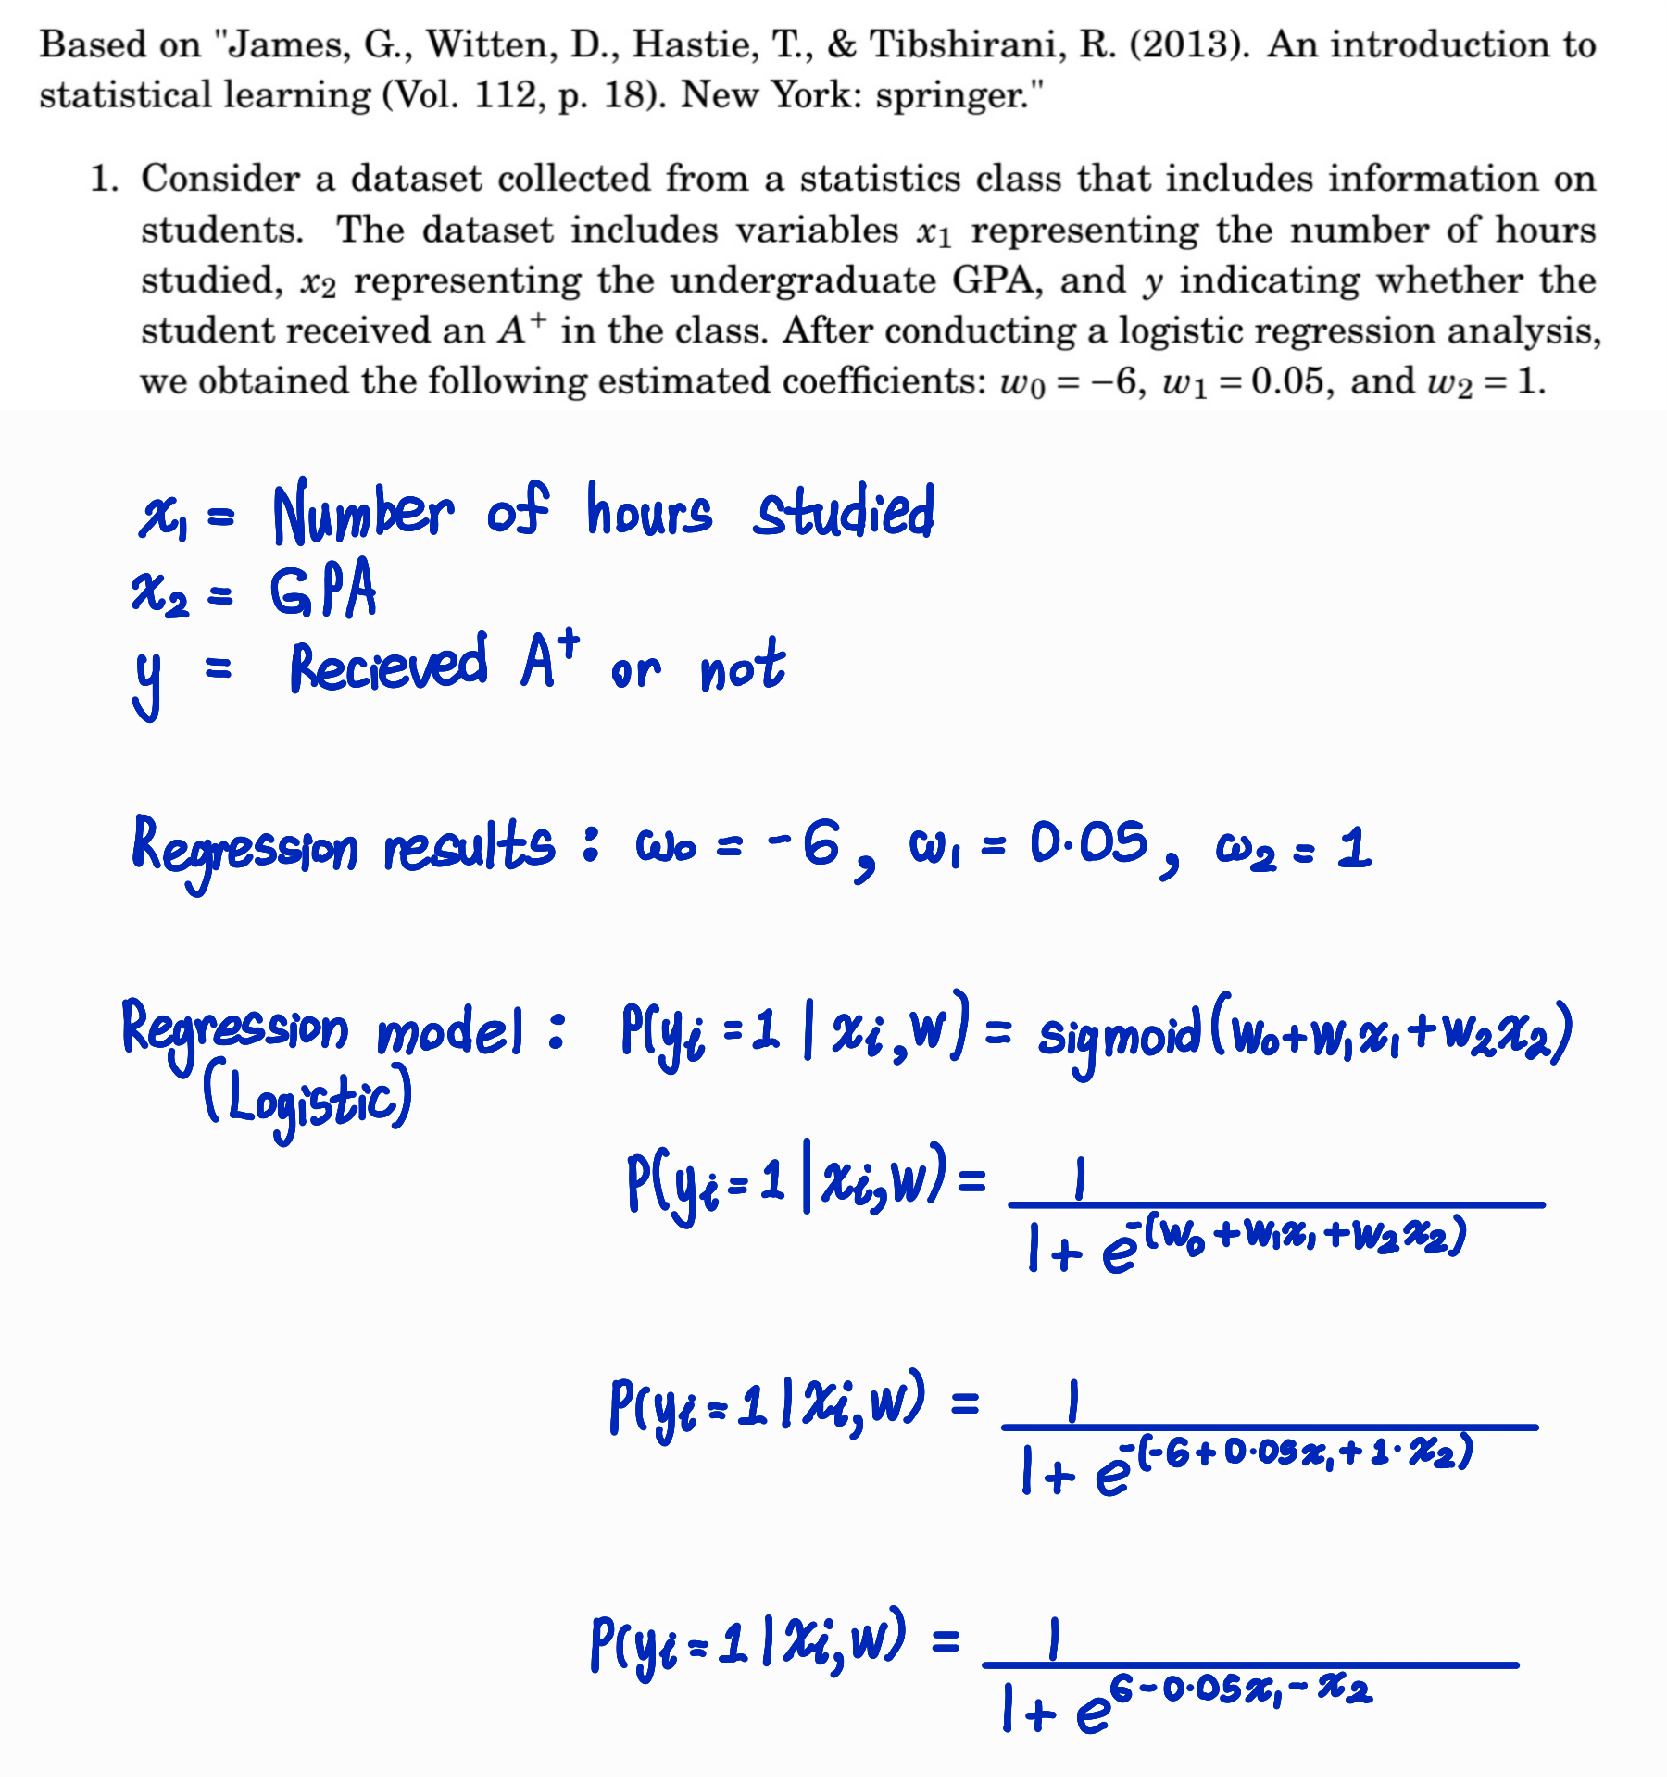

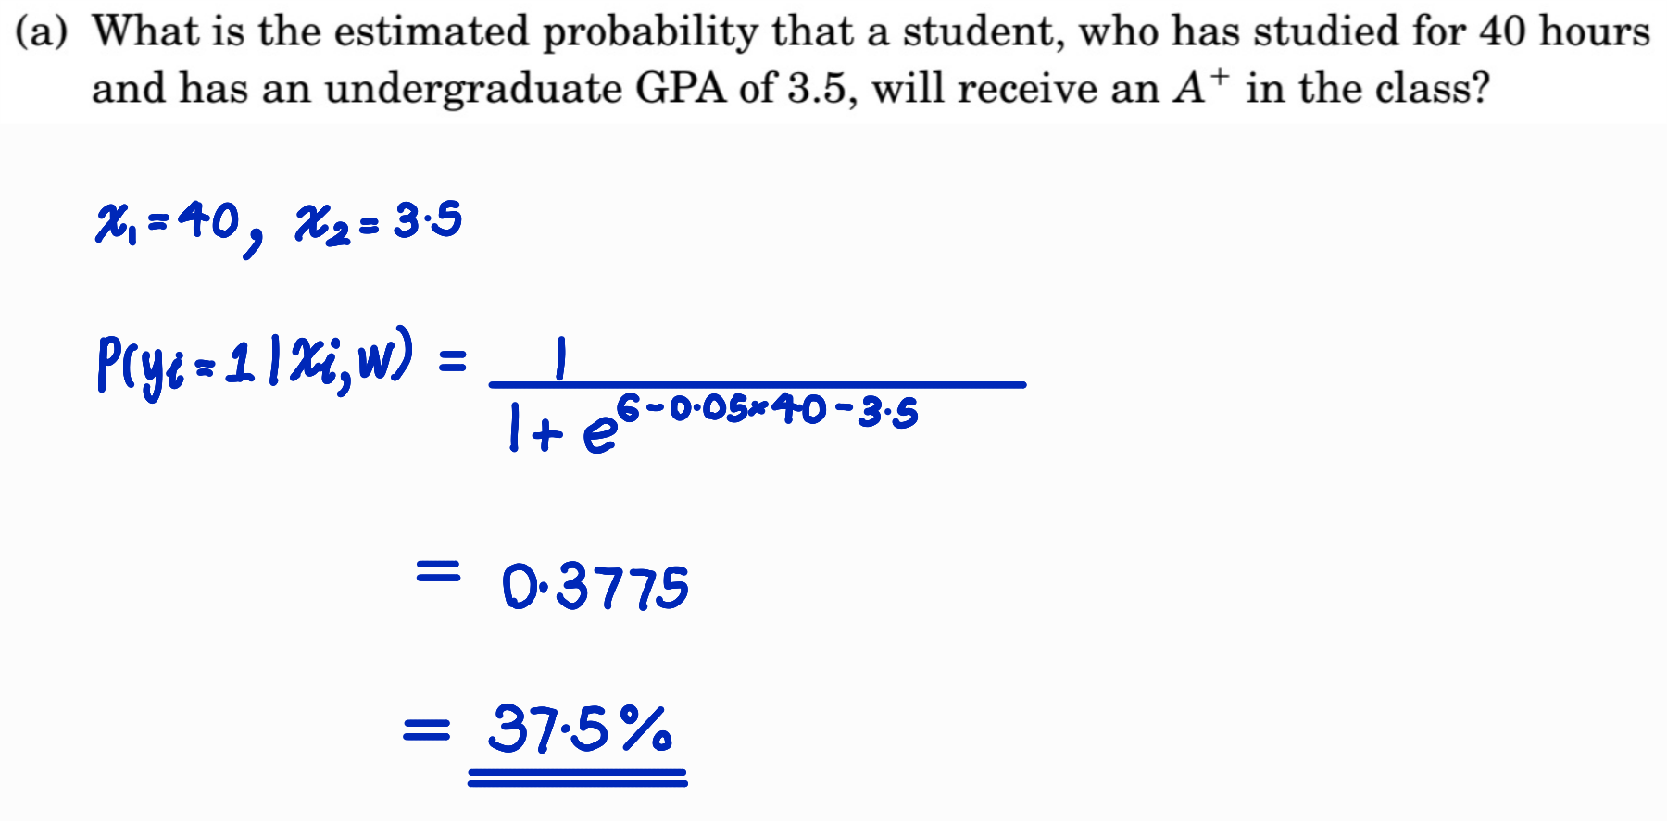

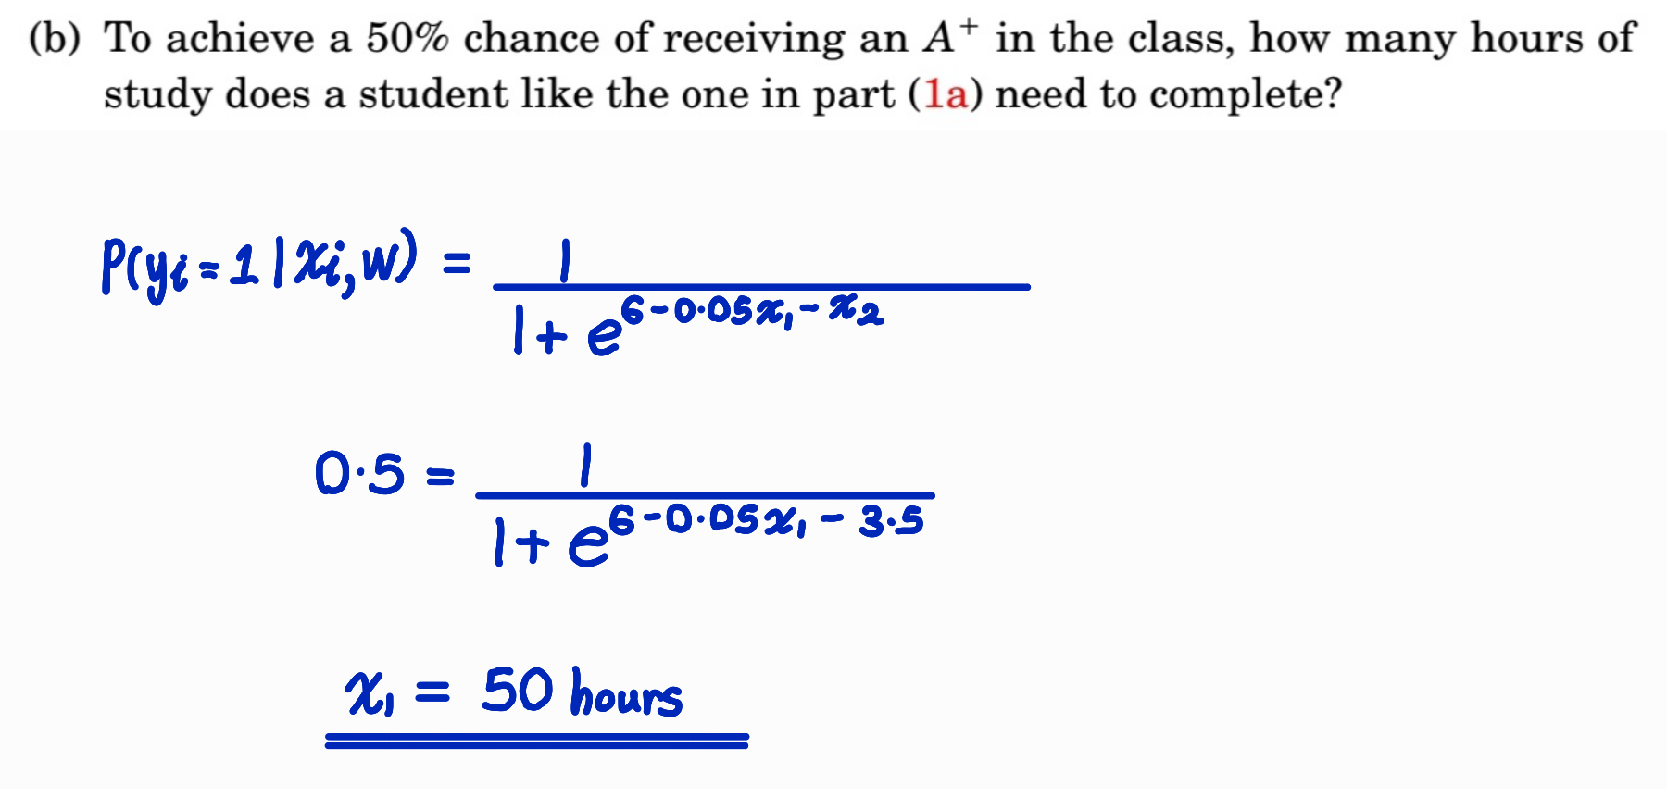

***End of Assignment 02: Learning from Data and Related Challenges & Classification***